# Data Collection and Analysis

### This document is for working with the data we pull from training the different mdoels.

Import libraries

In [2]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns
import scipy as stats
import pandas as pd

Load data from file

In [16]:
def load_data(file_path, model=None):
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_vector.pkl'
    # file_path = 'DQL_PLOT/TEST_PLOTS/plot_file_grid.pkl'

    with open(file_path, 'rb') as file:
        data = pickle.load(file)
        data = np.array(data)
    
        
    # load data as dataframe
    if model == 'tql': data = {'scores': data[0], 'apple': data[1], 'time per apple': data[1] / (data[0]/10)}
    else: data = {'scores': data[0],
            'steps_per_game': data[1],
            'epsilon': data[2],
            'game': np.arange(len(data[0])),
            'steps' : np.cumsum(data[1]),
            'time per apple': data[1] / (data[0]/10)
            }
    dataframe = pd.DataFrame(data = data)

    return dataframe 

# Defining data
onestep = load_data(file_path='DQL_PLOT/DATA_PLOTS/onestep_non_training_17_01.pkl')
vector = load_data(file_path='DQL_PLOT/DATA_PLOTS/vector_non_training_17_01.pkl')
tql = load_data(file_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.pkl', model="tql")


df_results = pd.DataFrame(data= {'onestep_score': onestep['scores'], 'vector_score': vector['scores'], 'tql_score': tql['scores']})
df_time = pd.DataFrame(data= {'onestep_time': onestep['time per apple'], 'vector_time': vector['time per apple'], 'tql_time': tql['time per apple']})
df_time.sort_values(by=['vector_time'], inplace=True)
df_time



,onestep_time,vector_time,tql_time
22454,14.571429,7.000000,25.333333
17942,14.178571,7.000000,25.000000
10237,15.931034,7.285714,26.771429
1792,16.823529,7.500000,23.312500
20067,14.909091,7.875000,25.590909
...,...,...,...
20434,16.058824,451.000000,22.904762
9514,14.611111,453.000000,23.750000
1479,13.850000,453.000000,25.039216
7572,12.384615,455.000000,22.592593


## Export CSV

In [72]:
# Export as csv from pickle
def export_csv(dataframe=None, save_path=None):
    return dataframe.to_csv(save_path, index=False)

# input variables
dataframe = tql
save_path='TAB_MODEL_AND_PLOT/DATA_PLOT_RUNNING/tab_optim_rewards_running.csv'

# Export to csv
export_csv(dataframe, save_path)


## Line Plots

C:\Users\vietn\AppData\Local\Temp\ipykernel_13524\299787473.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df_results, shade=True, alpha=0.2)


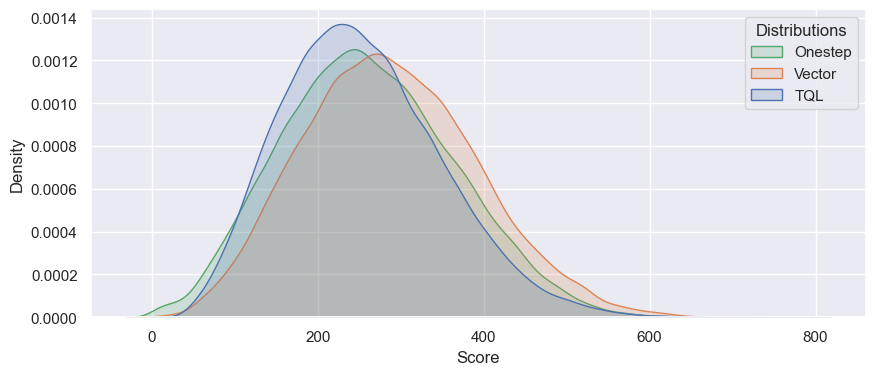

In [17]:
plt.figure(figsize=(10, 4))

# Plot the three normal distributions together
sns.set_theme(style="darkgrid")
sns.kdeplot(data=df_results, shade=True, alpha=0.2)

# Add labels and a legend
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Distributions", labels=["Onestep", "Vector", "TQL"])

# Show the plot
plt.show()
